# Street microgrid

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm, trange

In [2]:
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\smart meter'

In [3]:
class House(object):
    def __init__(self, number, filename):
        self.number = number
        
        self.smart_meter_data = pd.read_csv(dirpath+'/Power-Networks-LCL-June2015(withAcornGps)v2_'+str(self.number)+'.csv', parse_dates)
        self.smart_meter_data['DateTime'] = pd.to_datetime(smart_meter_data['DateTime'], dayfirst=True)


In [61]:
# smart meter data

smdpath = dirpath+'/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces'

smart_meter_data = pd.read_csv(smdpath+'/Power-Networks-LCL-June2015(withAcornGps)v2_1.csv', 
                               parse_dates=['DateTime'],
                               dayfirst=True,
                               usecols=['DateTime', 'KWH/hh (per half hour) '] )

smart_meter_data['KWH/hh (per half hour) '].fillna(0, inplace=True)
smart_meter_data['KWH/hh (per half hour) '].replace('Null', 0.0, inplace=True)
smart_meter_data['KWH/hh (per half hour) '] = smart_meter_data['KWH/hh (per half hour) '].astype(float)
smart_meter_data['house'] = 1

smart_meter_data['Date'] = smart_meter_data['DateTime'].dt.strftime('%Y-%m-%d')

smart_meter_data = smart_meter_data.drop_duplicates(subset=['DateTime'], keep='first')

smart_meter_data.shape

(39102, 4)

In [62]:
smart_meter_data.dtypes

DateTime                   datetime64[ns]
KWH/hh (per half hour)            float64
house                               int64
Date                               object
dtype: object

In [63]:
min_date  = np.min(smart_meter_data['DateTime'])
max_date  = np.max(smart_meter_data['DateTime'])

print(min_date, max_date)

2011-12-06 13:00:00 2014-02-28 00:00:00


In [64]:
min_pwr  = np.min(smart_meter_data['KWH/hh (per half hour) '])
max_pwr  = np.max(smart_meter_data['KWH/hh (per half hour) '])

print(min_pwr, max_pwr)

0.0 3.704


In [66]:
smart_meter_data.head(10)

,DateTime,KWH/hh (per half hour),house,Date
0,2012-10-12 00:30:00,0.0,1,2012-10-12
1,2012-10-12 01:00:00,0.0,1,2012-10-12
2,2012-10-12 01:30:00,0.0,1,2012-10-12
3,2012-10-12 02:00:00,0.0,1,2012-10-12
4,2012-10-12 02:30:00,0.0,1,2012-10-12
5,2012-10-12 03:00:00,0.0,1,2012-10-12
6,2012-10-12 03:30:00,0.0,1,2012-10-12
7,2012-10-12 04:00:00,0.0,1,2012-10-12
8,2012-10-12 04:30:00,0.0,1,2012-10-12
9,2012-10-12 05:00:00,0.0,1,2012-10-12


In [67]:
day = smart_meter_data[smart_meter_data['Date'] == '2012-11-16']
day.shape

(48, 4)

In [68]:
day.head(len(day))

,DateTime,KWH/hh (per half hour),house,Date
1630,2012-11-16 00:00:00,0.251,1,2012-11-16
1631,2012-11-16 00:30:00,0.261,1,2012-11-16
1632,2012-11-16 01:00:00,0.238,1,2012-11-16
1633,2012-11-16 01:30:00,0.227,1,2012-11-16
1634,2012-11-16 02:00:00,0.315,1,2012-11-16
1635,2012-11-16 02:30:00,0.212,1,2012-11-16
1636,2012-11-16 03:00:00,0.261,1,2012-11-16
1637,2012-11-16 03:30:00,0.111,1,2012-11-16
1638,2012-11-16 04:00:00,0.135,1,2012-11-16
1639,2012-11-16 04:30:00,0.094,1,2012-11-16


In [69]:
smart_meter_data['Date'].value_counts()

2012-12-19    52
2012-12-18    51
2012-10-12    48
2012-04-02    48
2012-03-25    48
              ..
2013-07-17    48
2013-07-18    48
2012-01-29    48
2011-12-06    22
2014-02-28     1
Name: Date, Length: 816, dtype: int64

0.074
1.341


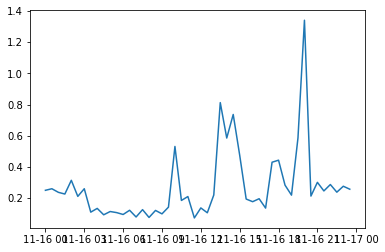

In [71]:

print(np.min(day['KWH/hh (per half hour) ']))
print(np.max(day['KWH/hh (per half hour) ']))


plt.plot(day['DateTime'], day['KWH/hh (per half hour) '])


#yticks = np.arange(0, 10, 2)

#plt.ylabel('house 1 demand')
plt.show()

In [ ]:
#smart_meter_data.to_csv(dirpath+'/all meters.csv')

In [18]:
# weather

weather_data = pd.read_csv(dirpath+'/GBR_London.Gatwick.037760_IWEC_copy.epw', sep='\t', 
                           usecols=['year', 'month', 'day', 'hour', 'minute', 
                                    'Global Horizontal Radiation', 'Total Sky Cover'],
                                    low_memory=False)

weather_data

,year,month,day,hour,minute,Global Horizontal Radiation,Total Sky Cover
0,1991,1,1,1,60,0,2
1,1991,1,1,2,60,0,1
2,1991,1,1,3,60,0,0
3,1991,1,1,4,60,0,0
4,1991,1,1,5,60,0,0
...,...,...,...,...,...,...,...
8755,1983,12,31,20,60,0,9
8756,1983,12,31,21,60,0,6
8757,1983,12,31,22,60,0,6
8758,1983,12,31,23,60,0,7


In [15]:
weather_data['Global Horizontal Radiation'].value_counts()

0      4174
1        79
3        60
4        58
2        56
       ... 
648       1
618       1
828       1
735       1
472       1
Name: Global Horizontal Radiation, Length: 781, dtype: int64

In [16]:
class SolarPV():
    
    def __init__(self, area, efficiency, performance_ratio):
        self.area = area
        self.efficiency = efficiency
        self.performance_ratio = performance_ratio
        
    def output(self, ghi):
        return ghi * self.area * self.efficiency * self.performance_ratio
    
    
    


In [17]:
pv = SolarPV(1.6, 0.25, 0.75)

pv.output(70)

21.0

In [56]:
955208 / 365

2617.008219178082